In [32]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv('D:/Prog/ML/tasks for education/LogReg/telecom_churn.csv')

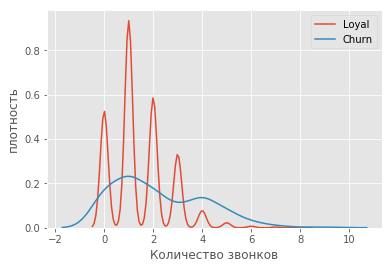

In [40]:
fig = sns.kdeplot(df[df['Churn'] == False]['Customer service calls'], label = 'Loyal')
fig = sns.kdeplot(df[df['Churn'] == True]['Customer service calls'], label = 'Churn')
fig.set(xlabel='Количество звонков', ylabel='плотность')
plt.show()

In [41]:
import numpy as np

In [44]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100*alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries
loyal_calls = df[df['Churn'] == False]['Customer service calls'].values
churn_calls = df[df['Churn'] == True]['Customer service calls'].values
np.random.seed()
loyal_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)]

print('Service calls from loyal:  mean interval', stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn:  mean interval",  stat_intervals(churn_mean_scores, 0.05))

Service calls from loyal:  mean interval [1.40419298 1.49438596]
Service calls from churn:  mean interval [2.05791925 2.39130435]


In [45]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
np.random.seed(42)
figsize(8, 6)
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Populating the interactive namespace from numpy and matplotlib


In [46]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x**2) + 1.5 *np.exp(-(x-2)**2)
def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

Text(0.5, 1.0, 'Случайный лес, MSE = 14.07')

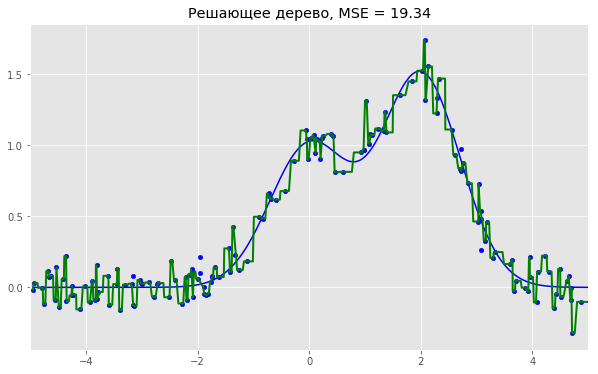

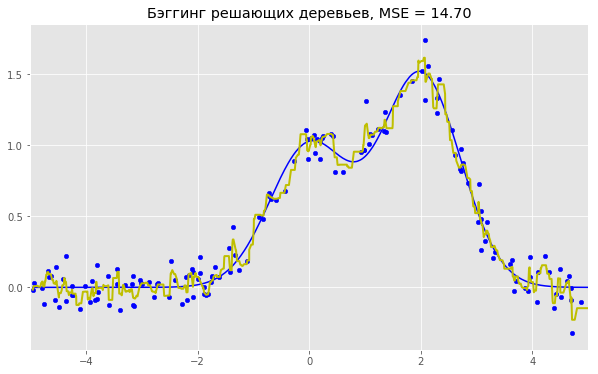

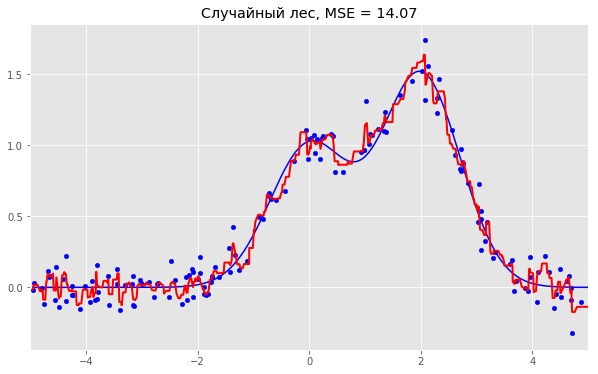

In [47]:
X_train, y_train = generate(n_samples = n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, d_predict, 'g', lw=2)
plt.xlim([-5, 5])
plt.title("Решающее дерево, MSE = %.2f" % np.sum((y_test - d_predict) ** 2))

bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), 'b')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, bdt_predict, 'y', lw=2)
plt.xlim([-5,5])
plt.title("Бэггинг решающих деревьев, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2))

rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Случайный лес, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2))